# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №1 - Метод k-средних, предобработка признаков


# <hr\>
**Общая информация**

**Срок сдачи:** до 7 октября 2017, 06:00   
**Штраф за опоздание:** -2 балла после 06:00 7 октября, -4 балла после 06:00 14 октября, -6 баллов после 06:00 21 октября

При отправлении ДЗ указывайте фамилию в названии файла   


Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush
Необходимо в slack создать таск в приватный чат:   
/todo Фамилия Имя *ссылка на гитхаб* @alkhamush   
Пример:   
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush   

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

# Первое задание - указать фамилию в имени файла

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Пролог: Модуль sklearn
На наших практических занятиях мы будем использовать [sklearn](http://scikit-learn.org/stable/index.html) (scikit-learn) - наиболее популярный модуль для работы с методами машинного обучения и анализа данных.

Этот модуль регулярно обновляется, расширяется и сопровождается примерами использования тех или иных методов. Помимо самих алгоритмов (например k-средних или линейной регрессии) в нем есть множество вспомогательных функций по работе с данными.

# Туториал: Работа с различными типами признаков

Вспомним какие типы признаков могут встретится при описании объектов исследования и как их представить в доступной для обработки компьтером форме

Типы признаков мы будем рассматривать на примере довольно популярного набора данных [titanic](https://www.kaggle.com/c/titanic/download/train.csv) - информации о выживаемости пассажиров после известной трагедии корабля Titanic.

In [2]:
df_titanic = pd.read_csv('train.csv', sep=',').dropna()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Бинарные признаки
Это признаки с двумя возможными значениями
* Пол (мужской, женский)
* Выжил (да, нет)

На вход в алгоритмы обычно подаются в виде значений `{0, 1}` (реже в виде `{-1, 1}`)

In [3]:
# Здесь все нормально
df_titanic.Survived.value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [4]:
# Тут стоит выполнить переобознаение
df_titanic.Sex.value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [5]:
# Например так
df_titanic.Sex = df_titanic.Sex.replace({'male': 0, 'female': 1})
df_titanic.Sex.value_counts()

0    95
1    88
Name: Sex, dtype: int64

## Вещественные признаки

* Возраст
* Сумма, потраченная на билет
* Количество родственников на борту

Как правило остаются в том же виде или выполняется **нормализация** признаков, т.е. переход к одинаковой шкале, например:

* $\tilde{x} = \frac{x - \text{mean}(x)}{\text{std}(x)}$
* $\tilde{x} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$

## Категориальные признаки

Принимают значения из *неупорядоченного* множества

* Порт погрузки (C = Cherbourg; Q = Queenstown; S = Southampton)
* Точка отправления (St Louis, MO; Montreal, PQ; .. }
* Точка назначения (Chesterville, ON; Roseville, IL; .. }

Обычно такие признаки кодируют с помощью так называемого One Hot Encoding: </br>
для каждой категории создается бинарная маска-столбец, в которой стоит `1` если значение признака равно значению соответствующей категории категории.

Например, для признака "порт погрзки" создается бинарная макска из трех стобцов для каждого из портов: С, Q, S<br/>
Если пассажир заходил на кораблю в порту Southampton, то его признаковое описание будет соответственно: `[0, 0, 1]`

In [10]:
print type(df_titanic.Embarked)
df_titanic.Embarked.head()

<class 'pandas.core.series.Series'>


1     C
3     S
6     S
10    S
11    S
Name: Embarked, dtype: object

In [ ]:
# Сделать в python это можно несколькими способами:

# 1: Через pandas (не очень рекомендуется)
emb = pd.get_dummies(df_titanic.Embarked, prefix='Embarked', prefix_sep='=')
emb.head()

In [ ]:
# 2: Функционал sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

emb = df_titanic.loc[:, ['Embarked']].replace({'C': 0, 'Q': 1, 'S': 2}).values
emb_enc = encoder.fit_transform(emb)
emb_enc[:5]

Про другием способы работы с категориальными переменными можно прочитать вот [тут](https://alexanderdyakonov.wordpress.com/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

## Порядковый признаки

Принимают значения из *упорядоченного* множества

* Класс каюты (1 > 2 > 3)

В зависимости от метода остаются можно оставить в исходном виде или применить OneHotEncoding.

## Текстовые признаки - Bag of words

Для демонстрации возьмем текст стихотворения Блока:

Ночь, улица, фонарь, аптека,<br/>
Бессмысленный и тусклый свет.<br/>
Живи еще хоть четверть века -<br/>
Все будет так. Исхода нет.<br/>

Умрешь - начнешь опять сначала<br/>
И повторится все, как встарь:<br/>
Ночь, ледяная рябь канала,<br/>
Аптека, улица, фонарь.<br/>

Пусть каждая строчка - это будет условный документ. Переведем эти документы в числовое представление по методу мешка слов (Bag Of Words)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = \
[u'Ночь, улица, фонарь, аптека,',
 u'Бессмысленный и тусклый свет.',
 u'Живи еще хоть четверть века -',
 u'Все будет так. Исхода нет.',
 u'Умрешь - начнешь опять сначала',
 u'И повторится все, как встарь:',
 u'Ночь, ледяная рябь канала,',
 u'Аптека, улица, фонарь.']

In [12]:
vect = CountVectorizer()

bow = vect.fit_transform(corpus)
bow = bow.toarray()
bow.shape

(8L, 27L)

Получили матрицу размера $8 \times 27$, так как у нас 8 строчек и выделилось 27 униальных слов. Элемент матрицы показывает сколько раз слово встречалось в соответствующем документе.

In [13]:
bow

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0]], dtype=int64)

In [14]:
# Посмотрим какие слова стоят по столбцам
for i, w in enumerate(vect.get_feature_names()):
    print u'столбец %d: %s' % (i, w)

столбец 0: аптека
столбец 1: бессмысленный
столбец 2: будет
столбец 3: века
столбец 4: все
столбец 5: встарь
столбец 6: еще
столбец 7: живи
столбец 8: исхода
столбец 9: как
столбец 10: канала
столбец 11: ледяная
столбец 12: начнешь
столбец 13: нет
столбец 14: ночь
столбец 15: опять
столбец 16: повторится
столбец 17: рябь
столбец 18: свет
столбец 19: сначала
столбец 20: так
столбец 21: тусклый
столбец 22: улица
столбец 23: умрешь
столбец 24: фонарь
столбец 25: хоть
столбец 26: четверть


# Туториал: Имплементация собственного метода

Для решения задач вида "имплементируйте метод X" крайне желательно (но необязательно) реализовывать методы с помощью интерфейса sklearn. Ниже вы увидите пример очень простого **классификатора**. Используйте эти наработи для выполнения задания.

Загрузите [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) с информацией о характеристиках вина и его качестве. (В метод `pd.read_csv()` можно подать веб-ссылку на данные и пандас их скачает и преобразует в `DataFrame`).

In [15]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [16]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Наша задача состоит в предсказании целевого признака `quality` по остальным признакам. `quality` - это вещественная переменная (оценка качества от 0 до 10). Упростим себе задачу - создадим новый столбец `quality_cat` по следующим правилам:

* `quality_cat = 1` если `quality > 5` 
* `quality_cat = 0` - иначе 

Таким образом, `quality_cat` характерует "плохое" и "хорошее" вино.

In [19]:
def prepocess_wine(df):
    df.loc[:, 'quality_cat'] = (df.loc[:, 'quality'] > 5).astype(int)
    df = df.drop('quality', axis=1)
    
    return df

In [20]:
df_wine = df_wine.pipe(prepocess_wine)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Нарисуем распределение хорошего и плохого вина по признаку `alcohol`.

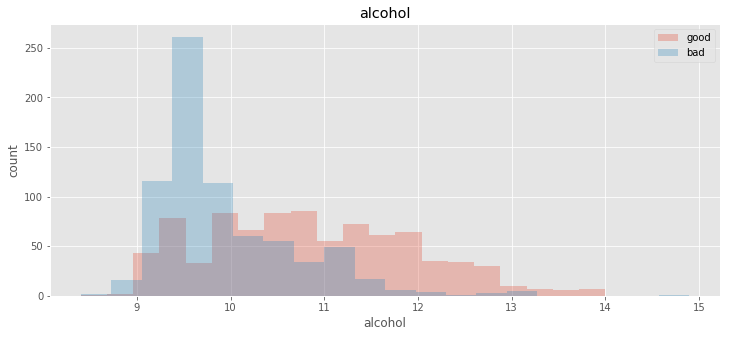

In [21]:
_, ax = plt.subplots(1,1)
df_wine.query('quality_cat == 1').hist('alcohol', alpha=0.3, bins=20, label='good', ax=ax)
df_wine.query('quality_cat == 0').hist('alcohol', alpha=0.3, bins=20, label='bad', ax=ax)
ax.set_xlabel('alcohol')
ax.set_ylabel('count')
plt.legend()

Визуально кажется, что можно найти некоторое пороговое значение признака `alcohol` $\theta$, чтобы хорошо дискриминировать между плохими и хорошим вином:
* Если `alcohol >` $\theta$ - то предсказываем, что вино хорошее
* Если `alcohol <=` $\theta$ - то предсказываем, что вино плохое

Обучаеть классификатор будем очень просто: перебирать значения признака alchol и считать **ошибку** классификации. То значение, где ошибка минимальна и будет оптимальным.

Разделим целевой признак от остальных признаков

In [26]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values

Далее вы увидете пример реализации этого простого классификатора.

In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SimpleClassifier(BaseEstimator, ClassifierMixin): 
    
    def __init__(self):
        """
        Инициализация метода
        """
        
        self.threshold = 0

    def fit(self, X, y=None):
        """
        Выполняет процедуру обучения классификатора. В данном случае - перебор занчения признака alcohol.
        Договоримся, что признак alcohol будет в последнем столбце матрицы X
        """
        
        alcohol = X[:,-1]
        n = float(y.shape[0])
        
        # Задаем пространство поиска
        alco_range = np.arange(alcohol.min(), alcohol.max(), 0.1)
        
        min_error_rate = 1
                
        #  Начинаем поиск
        for theta in alco_range:
            prediction = alcohol > theta
            
            error_rate = sum(prediction != y)/n
            
            if error_rate < min_error_rate:
                min_error_rate = error_rate
                self.threshold = theta  
        
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания класса по обученному порогу
        """
        
        return (X[:,-1] > self.threshold).astype(int)

Обучаем модель

In [29]:
model = SimpleClassifier()
model.fit(X, y)

print 'Оптимальный порог: %f' % model.threshold

Оптимальный порог: 10.000000


Получаем предсказание модели (на обучающей выборке)

In [30]:
y_hat = model.predict(X)

Оценим долю ошибок на обучающей выборке

In [31]:
error_rate = sum(y_hat != y)/float(y.shape[0])
print 'Доля ошибок на обучающей выборке: %f' % error_rate

Доля ошибок на обучающей выборке: 0.295184


## Проверка метода на контрольной выборке

Мы обучили наш метод на данных о красном виде. 

Посмотрим, выполняется ли так же хорошо закономерность между качеством и уровнем алкоголя в белом вине.

In [32]:
df_wine_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                           sep=';')

df_wine_test = df_wine_test.pipe(prepocess_wine)
df_wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [33]:
X_test, y_test = df_wine_test.iloc[:, :-1].values, df_wine_test.iloc[:, -1].values
y_hat = model.predict(X_test)

In [34]:
error_rate = sum(y_hat != y_test)/float(y_test.shape[0])
print 'Доля ошибок на контрольной выборке: %f' % error_rate

Доля ошибок на контрольной выборке: 0.312577


Получилось неплохо и это лишь наивный алгоритм на одном признаке! Ну а выводы делайте сами =)

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). Для этого рекомендуется использовать инструмент %timeit. График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [29]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

In [407]:
from sklearn.base import ClusterMixin
from sklearn.base import BaseEstimator
from sklearn.metrics.pairwise import euclidean_distances

#принимает (двумерный nparray, двумерный nparray), расчитывает матрицу дистанций (аналогично euclidean_distances sklearn)
#Работает гораздо вызова функции для каждой пары векторов!
def euclidian_square(X, Y):
    return -2*(np.dot(X, Y.T))+((X*X).sum(axis=1) [np.newaxis]).T+(Y*Y).sum(axis=1)

def init_random_points(k, X):  
    return X [np.random.randint(0, X.shape[0], k)]

def init_random(k, X):
    centroids = np.empty((k, X.shape[1]))
    for i in xrange(0, k):
        centroids [i] = np.apply_along_axis((lambda coords: np.random.random_sample()*
                                             (coords.max(axis=0)-coords.min(axis=0))+coords.min(axis=0)), 0, X)
    return centroids

def init_kmeans_pp (k, X):
    centroids = np.empty((k, X.shape[1]))
    centroids [0] = X [np.random.randint(0, X.shape[0])]
    
    for i in xrange(1, k):
        min_distances = euclidean_distances(X, centroids [0:i]).min(axis=1) #расстояния до известных центройидов
        probabilities = min_distances/(min_distances.sum())
        centroids [i] = X [np.random.choice(xrange(0, X.shape[0]), p=probabilities)]
    
    return centroids

class Kmeans(BaseEstimator, ClusterMixin): 
    def __init__(self, k=8, metric=euclidian_square, accuracy=1e-4, max_iter=300, random_state=None, init=init_random_points):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.accuracy = accuracy
        
        self.init_func = init     #принимает (к-во центроидов, random_state, объекты), возвращает nparray центройдов
        self.metric_func = metric #принимает (двумерный nparray, двумерный nparray), расчитывает матрицу дистанций (аналогично euclidean_distances sklearn)
    
    #Возвращает True, если центройды не сдвинулись, обновляет центройды и возвращает False в противном случае
    def _check_and_update_centroids(self, new_centroids):
        if self.metric(new_centroids, self.centroids).max() < self.accuracy*self.accuracy: #Если центройды не двигаются
            return True
        else:
            self.centroids = new_centroids
            return False
            

    def fit(self, X, y=None): #y - массив меток центройдов для объектов X
        """
        Процедура обучения k-means
        """
        count_objects = X.shape[0]
        dimentions    = X.shape[1]
        
        # Массив с центройдами кластеров
        np.random.seed(self.random_state)  
        self.centroids = self.init_func(self.k, X)
        
        for i in xrange(0, self.max_iter):
            #Найдем каждой точке центройд
            y = self.predict (X, y)
            
            #Найдем новые центройды
            new_centroids = np.empty((self.k, dimentions))
            for j in xrange(0, self.k):
                objects_for_centroid = X [y == j]
                if not (objects_for_centroid.size == 0):
                    new_centroids [j] = objects_for_centroid.mean(axis=0) #покоординатно (axis=0)
                else:
                    new_centroids [j] = self.centroids [j]
                    
            if self._check_and_update_centroids(new_centroids): #Если центройды не двигаются
                break

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        if y is None:
            y = np.empty(X.shape[0])

        y = self.metric(X, self.centroids).argmin(axis=1)
        
        return y
        

class MiniBatchKMeans(Kmeans):
    def __init__(self, max_iter=300, k=8, metric=euclidian_square, random_state=None, init=init_random_points, count_random=10):
        Kmeans.__init__ (self, k, metric, 0, max_iter, random_state, init)
        self.count_random_objects = count_random
    
    def fit(self, X, y=None):
        self.centroids = self.init_func(self.k, X)
        
        count_objects = X.shape[0]
        dimentions    = X.shape[1]
        if self.count_random_objects >= count_objects: #Бесполезно применять MiniBatch
            return Kmeans.fit(X, y)
        
        #Для каждого центройда считаем число принадлежащих ему точек. Первая точка всегда есть - это исходный центройд
        np.random.seed(self.random_state)  
        count_obj_for_centroids = np.ones(self.k)
        
        for i in xrange(0, self.max_iter):
            X_subset = X [np.random.randint(0, count_objects, self.count_random_objects)]
            labels = self.predict (X_subset)
            
            for j in xrange(0, self.k):
                new_sum_coords = (self.centroids [j])*(count_obj_for_centroids [j])+X_subset [labels == j].sum(axis=0)
                count_obj_for_centroids [j] += (labels == j).sum ()
                
                #Усреднение с учетом всего, что было до для данного центройда
                self.centroids [j] = new_sum_coords/(count_obj_for_centroids [j])
                    
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [215]:
from sklearn.datasets import make_blobs

In [271]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=True, random_state=1234)

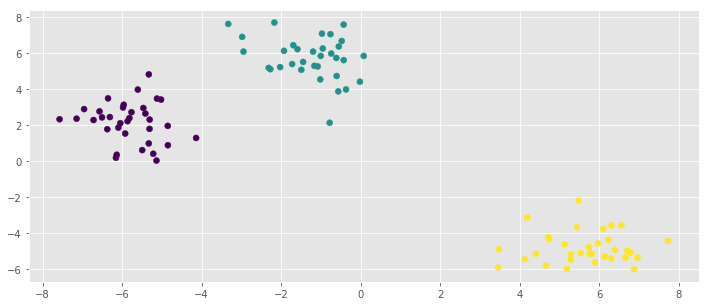

In [272]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта задание не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

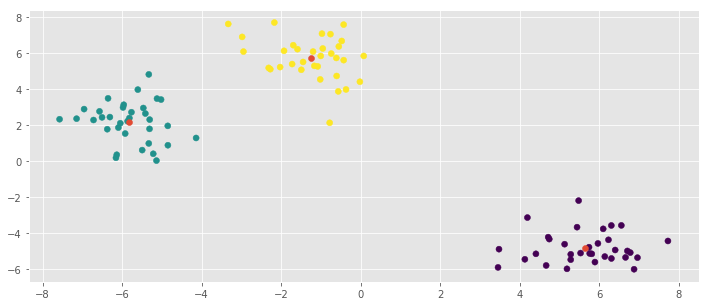

In [618]:
## Работоспособность KMeans
kmeans = Kmeans(k=3, metric=euclidian_square)
y1 = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y1)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1])

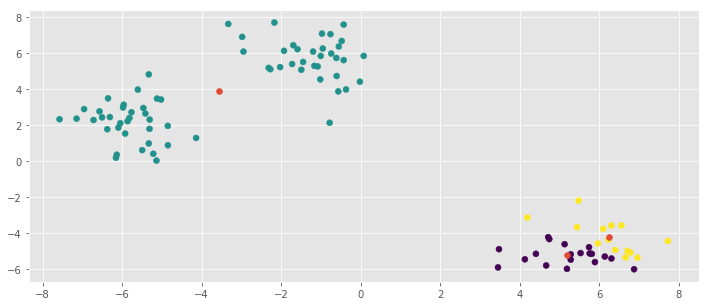

In [645]:
## Работоспособность KMeans++
kmeanspp = Kmeans(k=3, metric=euclidian_square, init=init_kmeans_pp)
y1 = kmeanspp.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y1)
plt.scatter(kmeanspp.centroids[:,0], kmeanspp.centroids[:,1])

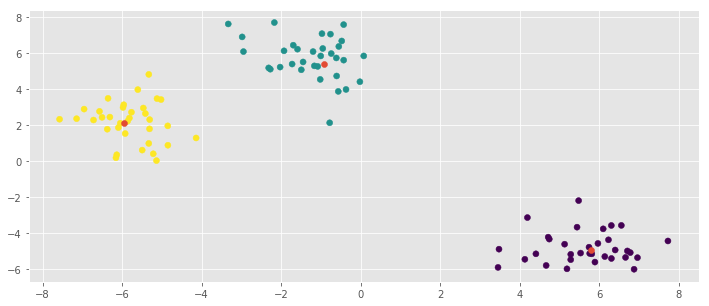

In [625]:
## Работоспособность KMeans с MiniBatchKMeans
kmeans_minibatch = MiniBatchKMeans(k=3, count_random=10, max_iter=5)
y1 = kmeans_minibatch.fit(X).predict(X)
plt.scatter(X[:,0], X[:, 1], c=y1)
plt.scatter(kmeans_minibatch.centroids[:,0], kmeans_minibatch.centroids[:,1])

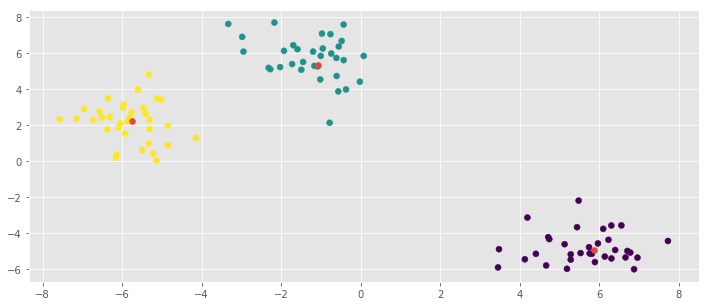

In [649]:
## Работоспособность KMeans++ с MiniBatchKMeans
kmeanspp_minibatch = MiniBatchKMeans(k=3, count_random=10, max_iter=5, init=init_kmeans_pp)
y1 = kmeanspp_minibatch.fit(X).predict(X)
plt.scatter(X[:,0], X[:, 1], c=y1)
plt.scatter(kmeanspp_minibatch.centroids[:,0], kmeanspp_minibatch.centroids[:,1])

**Проверка времени исполнения в зависимости от количества сэмплов**

In [532]:
## Сгенерируем сэмплы
sizes = np.arange(1000, 5500, 500)
samples = pd.Series(index=xrange(0, sizes.size), dtype=object)
true_clusters = pd.Series(index=xrange(0, sizes.size), dtype=object)

#Все сэмплы: общий квадрат от -size/10 до +size/10; centers=centers_const, cluster_std=size/100
centers_const = 10

for i in xrange(0, sizes.size):
    samples [i], true_clusters [i] = make_blobs(n_samples=sizes [i], n_features=2, centers=centers_const, 
                                                cluster_std=sizes [i]/100, center_box=(-sizes [i]/10, sizes [i]/10),
                                                shuffle=False, random_state=1234)

#Для результатов
measure_results = pd.DataFrame(index=xrange(0, sizes.size))
predict_quality = pd.DataFrame(index=xrange(0, sizes.size))

np.random.seed(1234)

def measure_function(name, clasterizator_object):
    for i in xrange(0, sizes.size):
        #для передачи в timeit
        global g__timeit_params__
        #tuple: объект класса-кластеризатора и массив данных
        g__timeit_params__ = (clasterizator_object, np.array(samples [i]))
        
        res = %timeit -o -q -n 3 g__timeit_params__ [0].fit(g__timeit_params__ [1])
        measure_results.loc [i, name] = np.average(res.all_runs)
        
        #Возьмем результат predict по результатам третьего обучения
        predict_quality.loc [i, name] = sk.metrics.cluster.adjusted_rand_score(clasterizator_object.predict(samples [i]),
                                                                               true_clusters [i])
        
        print "size {0}, time = {1}, predict quality = {2}".format(sizes [i], measure_results.loc [i, name], predict_quality.loc [i, name])

In [540]:
## Время выполнения алгоритма KMeans
measure_function("Kmeans", Kmeans(k=centers_const))

size 1000, time = 0.328339736005, predict quality = 0.623982409634
size 1500, time = 0.404273153189, predict quality = 0.837432449835
size 2000, time = 0.478108845519, predict quality = 0.831712588621
size 2500, time = 0.548275252881, predict quality = 0.726855919226
size 3000, time = 0.625723825813, predict quality = 0.713172555633
size 3500, time = 0.796924730602, predict quality = 0.726582769586
size 4000, time = 0.879937154155, predict quality = 0.702099844506
size 4500, time = 1.01340188378, predict quality = 0.714490514746
size 5000, time = 1.05946116963, predict quality = 0.711505195464


In [541]:
## Время выполнения алгоритма KMeans++
measure_function("Kmeans++", Kmeans(k=centers_const, init=init_kmeans_pp))

size 1000, time = 0.361776449739, predict quality = 0.787744628797
size 1500, time = 0.407819176511, predict quality = 0.800852145549
size 2000, time = 0.461855177812, predict quality = 0.694827021926
size 2500, time = 0.55417090605, predict quality = 0.799791728215
size 3000, time = 0.583765706416, predict quality = 0.791309340664
size 3500, time = 0.838797156764, predict quality = 0.613843719285
size 4000, time = 0.951321585287, predict quality = 0.710922596088
size 4500, time = 0.953041349159, predict quality = 0.622976399788
size 5000, time = 1.07255505454, predict quality = 0.798213181777


In [542]:
## Время выполнения алгоритма KMeans с MiniBatchKMeans
measure_function("MB_Kmeans", MiniBatchKMeans(k=centers_const))

size 1000, time = 0.18793447531, predict quality = 0.647032834168
size 1500, time = 0.178844472263, predict quality = 0.680890038678
size 2000, time = 0.161389443359, predict quality = 0.643101978747
size 2500, time = 0.175523134948, predict quality = 0.708468115413
size 3000, time = 0.179745700151, predict quality = 0.713224410785
size 3500, time = 0.170115146662, predict quality = 0.62765478118
size 4000, time = 0.180427830721, predict quality = 0.684859378799
size 4500, time = 0.199179021551, predict quality = 0.698047874473
size 5000, time = 0.179759775368, predict quality = 0.684170364772


In [543]:
## Время выполнения алгоритма  KMeans++ с MiniBatchKMeans
measure_function("MB_Kmeans++", MiniBatchKMeans(k=centers_const, init=init_kmeans_pp))

size 1000, time = 0.18582981634, predict quality = 0.669629360267
size 1500, time = 0.192327185051, predict quality = 0.552118749127
size 2000, time = 0.182128655145, predict quality = 0.785557280496
size 2500, time = 0.185969223088, predict quality = 0.79286270463
size 3000, time = 0.177634003572, predict quality = 0.704872805087
size 3500, time = 0.191128307715, predict quality = 0.714515528824
size 4000, time = 0.22951039046, predict quality = 0.685966940222
size 4500, time = 0.230312160377, predict quality = 0.798416331067
size 5000, time = 0.259845692151, predict quality = 0.798208484232


Построение графиков

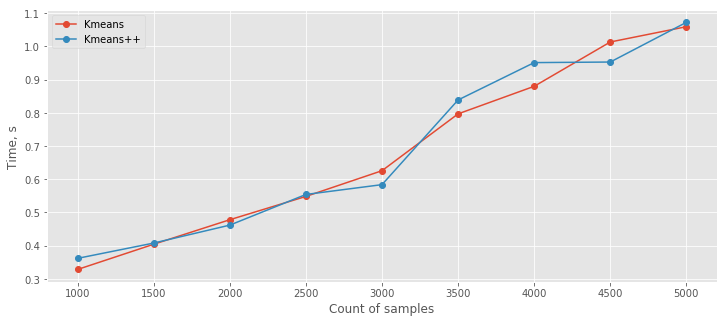

In [544]:
plt.plot(sizes, measure_results.loc [:, 'Kmeans'].values, marker = 'o', label = 'Kmeans')
plt.plot(sizes, measure_results.loc [:, 'Kmeans++'].values, marker = 'o', label = 'Kmeans++')
plt.legend()
plt.axes().set_xlabel("Count of samples")
plt.axes().set_ylabel("Time, s")

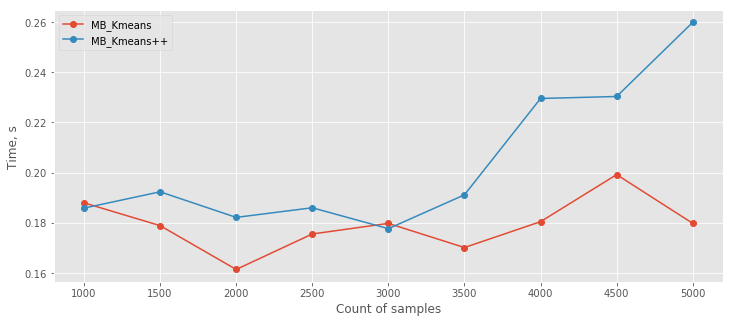

In [545]:
plt.plot(sizes, measure_results.loc [:, 'MB_Kmeans'].values, marker = 'o', label = 'MB_Kmeans')
plt.plot(sizes, measure_results.loc [:, 'MB_Kmeans++'].values, marker = 'o', label = 'MB_Kmeans++')
plt.legend()
plt.axes().set_xlabel("Count of samples")
plt.axes().set_ylabel("Time, s")

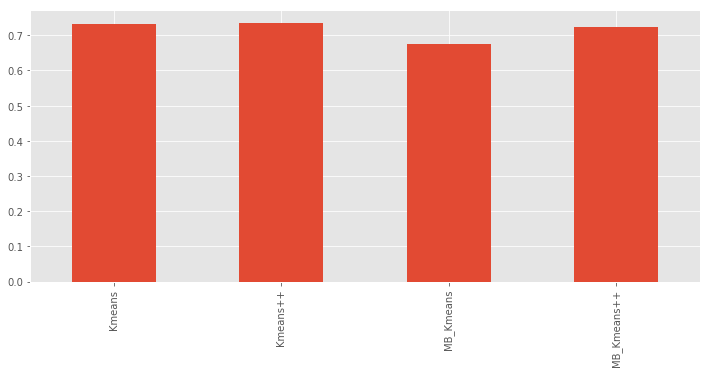

In [546]:
predict_quality.mean(axis=0).plot.bar()

* Таким образом, инициализация при помощи kmeans++ существенно не влияет на время выполнения классического алгоритма kmeans, однако может повысить качество кластеризации
* При применении kmeans++ инициализации с MiniBatch алгоритмом время работы несколько замедляется, вероятно, из-за расширения кластеров при увеличении качества кластеризации

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [599]:
df_sns = pd.read_csv('snsdata.csv', sep=',').dropna()
print df_sns.shape
df_sns.head()

(24005, 40)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2006,F,18.930,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [700]:
source = np.array(df_sns.iloc [:, 4:])
source = (source-source.mean(axis=0))/source.std(axis=0)
pd.options.display.max_columns = 50

In [701]:
## KMeans
kmeans_y = Kmeans(k=9, metric=euclidian_square).fit(source).predict(source)

df_sns.loc [:, 'Kmeans'] = kmeans_y
df_sns.groupby('Kmeans') ['age'].aggregate (['count']).join (df_sns.groupby('Kmeans').aggregate (['mean']))

,count,"(gradyear, mean)","(age, mean)","(friends, mean)","(basketball, mean)","(football, mean)","(soccer, mean)","(softball, mean)","(volleyball, mean)","(swimming, mean)","(cheerleading, mean)","(baseball, mean)","(tennis, mean)","(sports, mean)","(cute, mean)","(sex, mean)","(sexy, mean)","(hot, mean)","(kissed, mean)","(dance, mean)","(band, mean)","(marching, mean)","(music, mean)","(rock, mean)","(god, mean)","(church, mean)","(jesus, mean)","(bible, mean)","(hair, mean)","(dress, mean)","(blonde, mean)","(mall, mean)","(shopping, mean)","(clothes, mean)","(hollister, mean)","(abercrombie, mean)","(die, mean)","(death, mean)","(drunk, mean)","(drugs, mean)","(Kmeans++, mean)","(MB_Kmeans, mean)","(MB_Kmeans++, mean)"
Kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1598,2007.687109,17.519019,36.513767,1.066959,0.903630,1.565081,1.287234,0.989362,0.175845,0.070713,0.202128,0.094493,0.590113,0.269086,0.135169,0.121402,0.109512,0.061952,0.371715,0.214643,0.011890,0.722153,0.255945,0.449937,0.240300,0.095119,0.001252,0.362328,0.105131,0.103880,0.252816,0.387985,0.126408,0.035670,0.020025,0.144556,0.107635,0.063830,0.030663,3.709011,3.104506,7.027534
1,480,2007.370833,18.024954,33.620833,0.218750,0.331250,0.112500,0.135417,0.110417,0.156250,0.052083,0.041667,0.093750,0.100000,0.306250,0.183333,0.116667,0.102083,0.102083,0.516667,5.016667,1.575000,1.420833,0.397917,0.581250,0.304167,0.110417,0.010417,0.375000,0.133333,0.077083,0.222917,0.318750,0.147917,0.012500,0.008333,0.183333,0.131250,0.054167,0.039583,1.093750,5.968750,5.308333
2,343,2007.399417,18.113551,34.874636,0.399417,0.274052,0.274052,0.142857,0.160350,0.163265,0.090379,0.087464,0.113703,0.160350,0.381924,0.241983,0.110787,0.151603,0.078717,0.440233,0.405248,0.040816,1.029155,0.314869,2.341108,1.055394,0.854227,1.352770,0.518950,0.125364,0.102041,0.204082,0.355685,0.166181,0.034985,0.023324,0.291545,0.218659,0.119534,0.090379,5.029155,6.402332,4.265306
3,747,2007.582329,17.651901,30.717537,0.559572,0.516734,0.366801,0.277108,0.204819,0.277108,0.164659,0.208835,0.149933,0.528782,0.738956,2.713521,0.427041,0.277108,1.720214,0.903614,0.755020,0.037483,2.175368,1.111111,0.950469,0.385542,0.128514,0.028112,3.404284,0.358768,0.922356,0.722892,0.519411,0.709505,0.127175,0.127175,1.297189,0.538153,0.888889,1.128514,4.109772,0.334672,3.029451
4,358,2007.751397,17.285673,34.134078,1.011173,1.184358,0.463687,0.243017,0.145251,0.162011,0.220670,3.477654,0.078212,0.530726,0.527933,0.357542,0.240223,0.134078,0.075419,0.377095,0.187151,0.016760,0.868715,0.849162,0.432961,0.371508,0.097765,0.008380,0.541899,0.047486,0.505587,0.324022,0.237430,0.142458,0.027933,0.011173,0.139665,0.089385,0.055866,0.053073,2.455307,1.527933,6.019553
5,461,2007.483731,18.433282,35.715835,0.418655,0.290672,0.214751,0.167028,0.084599,0.104121,0.117137,0.110629,0.121475,0.143167,0.331887,0.127983,0.140998,0.145336,0.071584,0.459870,0.355748,0.019523,1.125813,0.308026,3.047722,3.759219,1.427332,0.013015,0.492408,0.154013,0.082430,0.323210,0.488069,0.240781,0.045553,0.030369,0.327549,0.223427,0.075922,0.062907,1.286334,6.746204,2.475054
6,3920,2007.579082,17.611351,36.062755,0.298469,0.307143,0.183163,0.097704,0.108929,0.238010,0.405612,0.068112,0.252551,0.117602,0.882653,0.224235,0.324490,0.379847,0.104592,1.158673,0.255102,0.009694,1.090306,0.376531,0.590561,0.318112,0.111224,0.000255,0.767347,0.349745,0.139541,0.677296,0.964031,0.389796,0.055867,0.037245,0.218367,0.162500,0.119643,0.040306,1.375255,2.408929,1.498214
7,15401,2007.420168,18.112204,27.918901,0.147003,0.145315,0.086423,0.063243,0.062593,0.094929,0.024933,0.035193,0.038244,0.081878,0.159146,0.102071,0.083241,0.052269,0.034738,0.220440,0.174145,0.010454,0.575417,0.159210,0.310305,0.113694,0.056360,0.000000,0.193884,0.042010,0.043569,0.122265,0.174469,0.053568,0.014804,0.009285,0.124408,0.082332,0.050711,0.022466,2.019220,2.999481,7.982404
8,697,2007.789096,17.516393,41.595409,0.407461,0.441894,0.335725,0.176471,0.265423,0.238164,0.288379

In [702]:
## KMeans++
kmeanspp_y = Kmeans(k=9, metric=euclidian_square, init=init_kmeans_pp).fit(source).predict(source)

df_sns.loc [:, 'Kmeans++'] = kmeanspp_y
df_sns.groupby('Kmeans++') ['age'].aggregate (['count']).join (df_sns.groupby('Kmeans++').aggregate (['mean']))

,count,"(gradyear, mean)","(age, mean)","(friends, mean)","(basketball, mean)","(football, mean)","(soccer, mean)","(softball, mean)","(volleyball, mean)","(swimming, mean)","(cheerleading, mean)","(baseball, mean)","(tennis, mean)","(sports, mean)","(cute, mean)","(sex, mean)","(sexy, mean)","(hot, mean)","(kissed, mean)","(dance, mean)","(band, mean)","(marching, mean)","(music, mean)","(rock, mean)","(god, mean)","(church, mean)","(jesus, mean)","(bible, mean)","(hair, mean)","(dress, mean)","(blonde, mean)","(mall, mean)","(shopping, mean)","(clothes, mean)","(hollister, mean)","(abercrombie, mean)","(die, mean)","(death, mean)","(drunk, mean)","(drugs, mean)","(Kmeans, mean)","(MB_Kmeans, mean)","(MB_Kmeans++, mean)"
Kmeans++,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3951,2007.578588,17.585958,36.096937,0.297140,0.283473,0.172108,0.105037,0.103771,0.146039,0.406732,0.068084,0.045052,0.113389,0.881043,0.221716,0.326247,0.378385,0.105543,1.174133,0.386991,0.041508,1.128828,0.383447,0.711972,0.588206,0.161731,0.001012,0.763604,0.356112,0.135156,0.682106,0.953936,0.390281,0.056948,0.035940,0.237408,0.177423,0.115920,0.039990,5.806631,2.828145,1.554543
1,743,2007.588156,17.652658,31.510094,0.555855,0.515478,0.358008,0.288022,0.209960,0.234186,0.157470,0.234186,0.115747,0.526245,0.741588,2.730821,0.430686,0.278600,1.728129,0.909825,0.860027,0.063257,2.205922,1.131898,0.951548,0.375505,0.126514,0.033647,3.454913,0.358008,0.938089,0.728129,0.531629,0.721400,0.121131,0.125168,1.286676,0.507402,0.876178,1.152086,2.986541,0.360700,3.074024
2,1656,2007.679952,17.589906,35.749396,1.089976,1.086353,1.544686,1.068237,0.183575,0.126812,0.094807,0.893116,0.062198,0.603261,0.303140,0.186594,0.142512,0.100242,0.061594,0.361715,0.223430,0.019928,0.747585,0.375000,0.448068,0.307971,0.096014,0.003623,0.368961,0.089976,0.181763,0.245773,0.318237,0.128019,0.028382,0.016908,0.157005,0.098430,0.061594,0.033213,1.035024,2.832126,6.705918
3,327,2007.366972,18.691489,32.201835,0.327217,0.327217,0.321101,0.073394,0.088685,0.162080,0.055046,0.091743,3.501529,0.226300,0.330275,0.140673,0.116208,0.094801,0.085627,0.388379,0.415902,0.039755,0.892966,0.278287,0.489297,0.379205,0.103976,0.006116,0.425076,0.119266,0.122324,0.204893,0.373089,0.168196,0.033639,0.039755,0.165138,0.146789,0.051988,0.039755,5.850153,2.568807,3.779817
4,15443,2007.415010,18.100837,27.977595,0.147575,0.147704,0.085864,0.065078,0.054070,0.058214,0.025060,0.035226,0.026679,0.081396,0.159295,0.103348,0.083080,0.052710,0.034967,0.221589,0.273133,0.046105,0.588228,0.162339,0.311921,0.122774,0.057826,0.000000,0.193939,0.042285,0.042738,0.121155,0.172441,0.053293,0.014634,0.009195,0.124134,0.082367,0.051156,0.022858,6.855922,3.105679,7.928511
5,435,2007.370115,18.629625,34.595402,0.381609,0.282759,0.243678,0.163218,0.124138,0.131034,0.101149,0.087356,0.087356,0.140230,0.305747,0.225287,0.105747,0.131034,0.071264,0.379310,0.482759,0.064368,1.036782,0.326437,3.581609,1.583908,1.579310,1.057471,0.471264,0.126437,0.091954,0.211494,0.340230,0.160920,0.034483,0.022989,0.308046,0.225287,0.117241,0.082759,2.668966,6.600000,3.747126
6,387,2007.627907,17.811858,32.364341,0.209302,0.304910,0.219638,0.111111,0.118863,2.821705,0.067183,0.111111,0.067183,0.118863,0.390181,0.134367,0.126615,0.155039,0.105943,0.408269,0.465116,0.054264,0.912145,0.284238,0.467700,0.242894,0.087855,0.002584,0.475452,0.100775,0.113695,0.299742,0.594315,0.191214,0.038760,0.023256,0.162791,0.121447,0.124031,0.033592,6.005168,1.361757,5.697674
7,369,2007.804878,17.352534,38.222222,0.861789,0.417344,0.298103,0.910569,4.157182,0.197832,0.135501,0.146341,0.094851,0.392954,0.360434,0.121951,0.135501,0.176152,0.056911,0.460705,0.214092,0.024390,0.718157,0.222222,0.509485,0.308943,0.116531,0.008130,0.471545,0.116531,0.132791,0.346883,0.588076,0.165312,0.059621,0.048780,0.108401,0.105691,0.056911,0.027100,1.092141,3.376694,6.956640
8,694,2007.795389,17.512029,41.670029,0.425072,0.440922,0.338617,0.208934,0.203170,0.217579,0.279539

In [703]:
## KMeans с MiniBatchKMeans
mb_kmeans_y = MiniBatchKMeans(k=9, metric=euclidian_square).fit(source).predict(source)

df_sns.loc [:, 'MB_Kmeans'] = mb_kmeans_y
df_sns.groupby('MB_Kmeans') ['age'].aggregate (['count']).join (df_sns.groupby('MB_Kmeans').aggregate (['mean']))

,count,"(gradyear, mean)","(age, mean)","(friends, mean)","(basketball, mean)","(football, mean)","(soccer, mean)","(softball, mean)","(volleyball, mean)","(swimming, mean)","(cheerleading, mean)","(baseball, mean)","(tennis, mean)","(sports, mean)","(cute, mean)","(sex, mean)","(sexy, mean)","(hot, mean)","(kissed, mean)","(dance, mean)","(band, mean)","(marching, mean)","(music, mean)","(rock, mean)","(god, mean)","(church, mean)","(jesus, mean)","(bible, mean)","(hair, mean)","(dress, mean)","(blonde, mean)","(mall, mean)","(shopping, mean)","(clothes, mean)","(hollister, mean)","(abercrombie, mean)","(die, mean)","(death, mean)","(drunk, mean)","(drugs, mean)","(Kmeans, mean)","(Kmeans++, mean)","(MB_Kmeans++, mean)"
MB_Kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,408,2007.656863,17.499392,40.958333,0.757353,0.419118,0.213235,4.649510,0.566176,0.169118,0.100490,0.218137,0.066176,0.404412,0.352941,0.227941,0.134804,0.105392,0.100490,0.387255,0.225490,0.012255,0.767157,0.262255,0.553922,0.345588,0.105392,0.012255,0.443627,0.147059,0.115196,0.303922,0.480392,0.218137,0.061275,0.044118,0.174020,0.134804,0.068627,0.049020,1.044118,2.906863,7.078431
1,742,2007.591644,17.733947,31.725067,0.564690,0.518868,0.349057,0.216981,0.206199,0.273585,0.156334,0.242588,0.154987,0.502695,0.777628,2.714286,0.407008,0.283019,1.750674,0.913747,0.756065,0.040431,2.191375,1.026954,0.951482,0.396226,0.118598,0.030997,3.475741,0.332884,0.935310,0.789757,0.543127,0.734501,0.130728,0.128032,1.204852,0.491914,0.884097,1.113208,3.126685,1.033693,2.983827
2,769,2007.767230,17.497977,41.607282,0.397919,0.429129,0.297789,0.150845,0.252276,0.226268,0.265280,0.096229,0.113134,0.182055,0.659298,0.224967,0.206762,0.310793,0.114434,0.622887,0.187256,0.006502,0.920676,0.286086,0.453836,0.421326,0.117035,0.011704,0.873862,0.153446,0.227568,0.842653,0.950585,0.621586,1.370611,1.075423,0.218466,0.163849,0.106632,0.071521,7.728218,7.158648,3.654096
3,426,2007.176056,17.984592,34.629108,0.347418,0.342723,0.201878,0.145540,0.119718,0.152582,0.136150,0.056338,0.115023,0.105634,0.704225,0.206573,0.173709,0.185446,0.105634,0.964789,0.389671,0.021127,0.892019,0.284038,0.544601,0.401408,0.096244,0.014085,0.814554,2.596244,0.100939,0.553991,0.821596,0.251174,0.061033,0.042254,0.230047,0.145540,0.096244,0.061033,5.711268,0.960094,5.847418
4,607,2007.487644,17.935586,34.044481,0.421746,0.517298,0.362438,0.151565,0.115321,0.153213,0.294893,0.275124,0.075783,0.123558,0.454695,0.342669,0.230643,0.126853,0.118616,0.578254,4.171334,1.235585,1.695222,1.329489,0.601318,0.334432,0.105437,0.018122,0.573311,0.123558,0.349259,0.291598,0.322900,0.197694,0.021417,0.018122,0.224053,0.153213,0.070840,0.060956,2.161450,2.828666,4.281713
5,386,2007.471503,18.463407,34.339378,0.375648,0.233161,1.865285,0.132124,0.137306,0.155440,0.090674,0.093264,0.119171,0.168394,0.290155,0.225389,0.093264,0.160622,0.077720,0.365285,0.409326,0.038860,1.067358,0.362694,3.759067,1.264249,1.800518,0.948187,0.474093,0.088083,0.106218,0.240933,0.401554,0.152850,0.041451,0.028497,0.344560,0.274611,0.119171,0.103627,2.339378,4.404145,3.414508
6,15517,2007.420764,18.104815,28.001869,0.143520,0.142489,0.124895,0.054585,0.062190,0.087388,0.025134,0.034478,0.037636,0.074306,0.158278,0.101695,0.082812,0.052136,0.034865,0.219695,0.176774,0.012760,0.572211,0.152800,0.311272,0.122769,0.057743,0.003093,0.192692,0.035316,0.042663,0.128826,0.173938,0.052652,0.014822,0.009409,0.125991,0.080943,0.051750,0.022427,6.885416,3.998647,7.977831
7,3715,2007.601346,17.627877,36.081561,0.271063,0.281561,0.235801,0.093674,0.104172,0.272948,0.384388,0.073217,0.269717,0.100942,0.879408,0.205114,0.328937,0.386003,0.097443,1.151817,0.227456,0.004576,1.065949,0.325437,0.721669,0.590848,0.165276,0.004845,0.726783,0.137820,0.136205,0.572544,0.951009,0.346164,0.051413,0.034186,0.231494,0.169583,0.113055,0.038762,5.853836,0.489637,1.214536
8,1435,2007.709408,17.473385,34.111498,1.268990,1.183275,0.735889,0.312195,0.979094,0.175610,0.103833

In [704]:
## KMeans++ с MiniBatchKMeans
mb_kmeanspp_y = MiniBatchKMeans(k=9, init=init_kmeans_pp, metric=euclidian_square).fit(source).predict(source)

df_sns.loc [:, 'MB_Kmeans++'] = mb_kmeanspp_y
df_sns.groupby('MB_Kmeans++') ['age'].aggregate (['count']).join (df_sns.groupby('MB_Kmeans++').aggregate (['mean']))

,count,"(gradyear, mean)","(age, mean)","(friends, mean)","(basketball, mean)","(football, mean)","(soccer, mean)","(softball, mean)","(volleyball, mean)","(swimming, mean)","(cheerleading, mean)","(baseball, mean)","(tennis, mean)","(sports, mean)","(cute, mean)","(sex, mean)","(sexy, mean)","(hot, mean)","(kissed, mean)","(dance, mean)","(band, mean)","(marching, mean)","(music, mean)","(rock, mean)","(god, mean)","(church, mean)","(jesus, mean)","(bible, mean)","(hair, mean)","(dress, mean)","(blonde, mean)","(mall, mean)","(shopping, mean)","(clothes, mean)","(hollister, mean)","(abercrombie, mean)","(die, mean)","(death, mean)","(drunk, mean)","(drugs, mean)","(Kmeans, mean)","(Kmeans++, mean)","(MB_Kmeans, mean)"
MB_Kmeans++,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4325,2007.601618,17.688534,36.132717,0.244624,0.242312,0.246705,0.108671,0.257572,0.182197,0.341040,0.070289,0.227977,0.121618,0.824046,0.257572,0.313988,0.344740,0.131792,1.053410,0.323237,0.026358,1.100578,0.371098,0.927168,0.584277,0.287168,0.064046,0.768786,0.131792,0.148902,0.641156,0.877688,0.366243,0.050867,0.034451,0.276301,0.191214,0.141040,0.064046,5.342890,0.830289,6.529017
1,15647,2007.420656,18.089500,28.103726,0.141689,0.092478,0.143670,0.064741,0.062824,0.077842,0.025117,0.035278,0.040775,0.081294,0.158625,0.103023,0.083275,0.053109,0.035342,0.223302,0.289065,0.049594,0.594299,0.164377,0.320764,0.126350,0.059628,0.007861,0.195501,0.036237,0.042948,0.118809,0.176967,0.053621,0.014508,0.009267,0.125072,0.083147,0.052087,0.022496,6.707803,3.990286,5.946060
2,148,2007.587838,18.924338,28.385135,0.182432,0.283784,0.243243,0.135135,0.155405,4.189189,0.060811,0.114865,0.108108,0.168919,0.412162,0.209459,0.162162,0.128378,0.114865,0.351351,0.378378,0.027027,0.790541,0.195946,0.662162,0.297297,0.081081,0.013514,0.540541,0.087838,0.155405,0.297297,0.594595,0.209459,0.047297,0.040541,0.175676,0.087838,0.135135,0.060811,5.777027,5.952703,6.148649
3,1320,2007.740909,17.478627,38.146212,1.675000,0.621970,0.949242,1.537879,0.654545,0.165909,0.235606,1.024242,0.106818,0.571970,0.352273,0.205303,0.137121,0.128030,0.065909,0.378030,0.257576,0.030303,0.816667,0.409848,0.598485,0.668939,0.151515,0.038636,0.448485,0.063636,0.203030,0.299242,0.386364,0.178788,0.044697,0.031818,0.168939,0.118182,0.057576,0.037879,1.518182,2.699242,5.519697
4,451,2007.558758,17.549785,32.740576,0.729490,0.614191,0.439024,0.356984,0.252772,0.281596,0.175166,0.297118,0.197339,0.614191,0.893570,3.702882,0.498891,0.328160,2.447894,1.115299,1.192905,0.121951,3.095344,1.731707,1.135255,0.403548,0.110865,0.046563,3.813747,0.441242,1.301552,0.694013,0.636364,0.949002,0.175166,0.168514,1.294900,0.569845,0.873614,0.807095,3.017738,1.028825,1.179601
5,449,2007.193764,17.952875,34.755011,0.320713,0.293987,0.211581,0.198218,0.175947,0.146993,0.149220,0.060134,0.131403,0.111359,0.692650,0.233853,0.198218,0.187082,0.129176,0.930958,0.501114,0.044543,0.930958,0.291759,0.536748,0.432071,0.106904,0.020045,0.873051,2.552339,0.104677,0.590200,0.819599,0.282851,0.037862,0.035635,0.229399,0.146993,0.082405,0.075724,5.447661,0.991091,2.964365
6,781,2007.476312,17.864018,29.647887,0.396927,2.886044,0.350832,0.106274,0.126761,0.094750,0.065301,0.280410,0.084507,0.293214,0.218950,0.144686,0.092190,0.089629,0.043534,0.419974,0.275288,0.020487,0.633803,0.212548,0.418694,0.211268,0.085787,0.011524,0.243278,0.071703,0.069142,0.197183,0.233035,0.111396,0.030730,0.012804,0.139565,0.088348,0.064020,0.019206,4.236876,2.996159,6.701665
7,191,2007.680628,17.953220,27.900524,0.397906,0.387435,0.387435,0.235602,0.219895,0.157068,0.094241,0.172775,0.089005,1.523560,0.324607,0.712042,0.287958,0.350785,0.230366,0.518325,0.366492,0.031414,1.104712,0.455497,0.649215,0.387435,0.109948,0.020942,2.837696,0.104712,0.350785,0.696335,0.293194,0.261780,0.041885,0.062827,0.874346,0.319372,0.712042,2.062827,2.654450,1.256545,2.649215
8,693,2007.780664,17.525567,41.839827,0.383838,0.427128,0.326118,0.160173,0.275613,0.207792,0.284271

In [705]:
# Анализ различий: степень схожести кластеризаций
print sk.metrics.cluster.adjusted_rand_score(kmeans_y, kmeanspp_y)
print sk.metrics.cluster.adjusted_rand_score(mb_kmeans_y, mb_kmeanspp_y)
print sk.metrics.cluster.adjusted_rand_score(kmeans_y, mb_kmeans_y)
print sk.metrics.cluster.adjusted_rand_score(kmeanspp_y, mb_kmeanspp_y)

0.890967046547
0.84149199918
0.904870071668
0.833183003856


In [706]:
## Вывод

Алгоритмы кластеризации на основе k-means дают примерно одинаковую точность кластеризации (см. попарные сравнения). Использование инициализации k-means++ может несколько повысить точность (см. сравнение алгоритмов выше), но этот метод все равно не застрахован от "экстримальных" (очень маленьких) кластеров и других ошибок кластеризации. Использование MiniBatch снижает точность незначительно, но существенно ускоряет алгоритм.  
Таким образом, наиболее выгодным алгоритмом можно считать **MiniBatch K-means++**

** Интерпретация кластеров **  
Полученных по алгоритму Kmeans++ (как наиболее теоретически точному)

Cluster 0
Count = 3951, Age = 17.5859579853, firends=36.0969374842


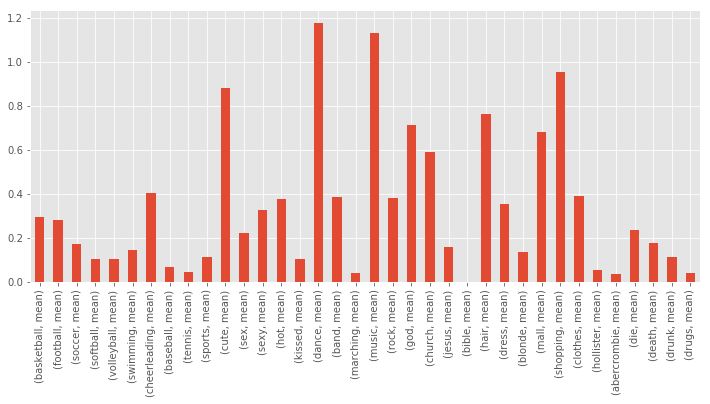

Cluster 1
Count = 743, Age = 17.6526581427, firends=31.5100942127


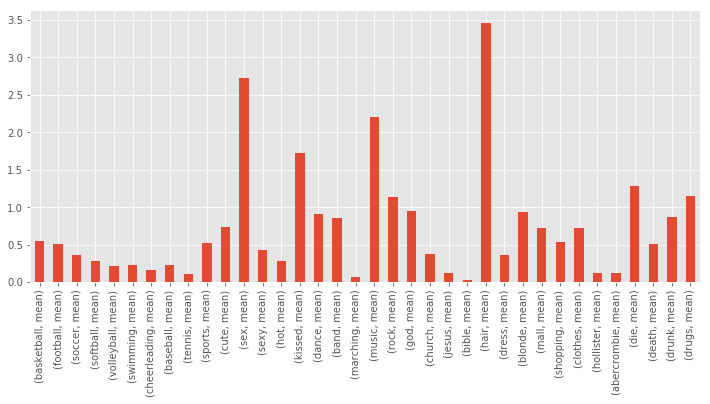

Cluster 2
Count = 1656, Age = 17.5899057971, firends=35.7493961353


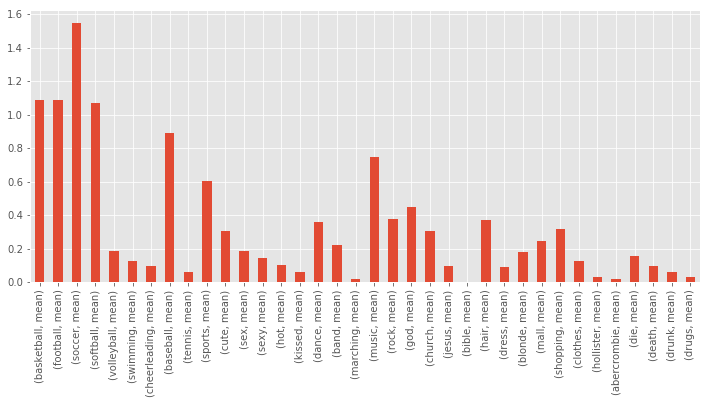

Cluster 3
Count = 327, Age = 18.6914892966, firends=32.2018348624


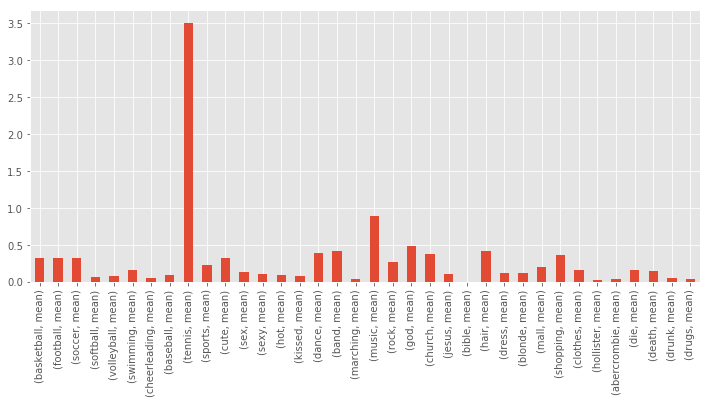

Cluster 4
Count = 15443, Age = 18.100837143, firends=27.9775950269


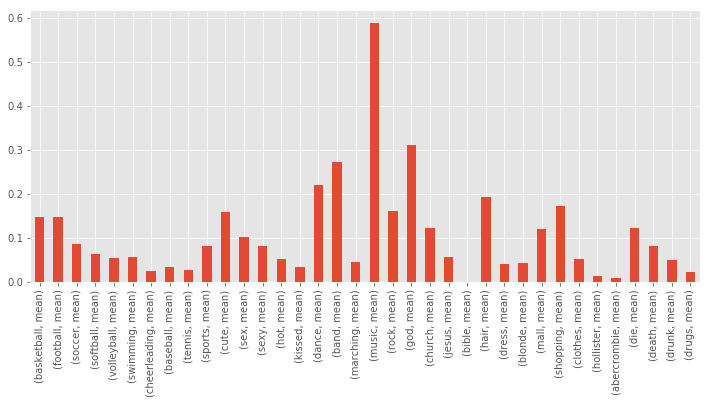

Cluster 5
Count = 435, Age = 18.6296252874, firends=34.5954022989


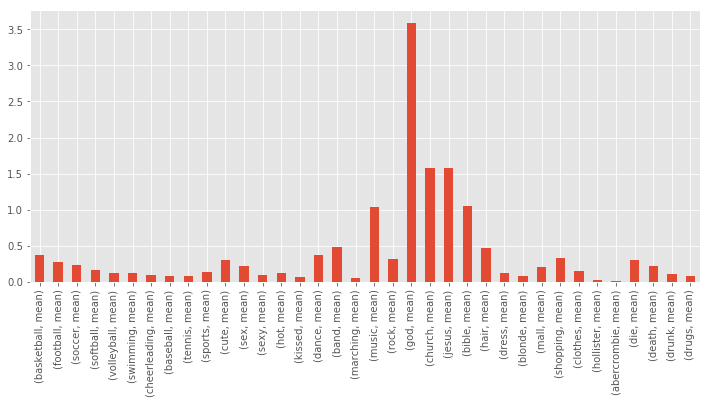

Cluster 6
Count = 387, Age = 17.8118578811, firends=32.3643410853


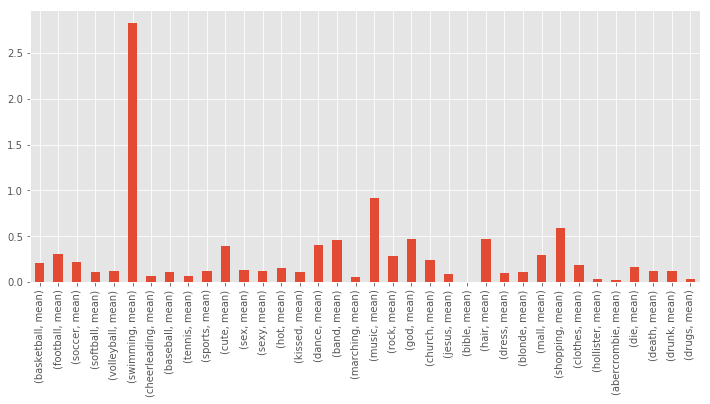

Cluster 7
Count = 369, Age = 17.3525338753, firends=38.2222222222


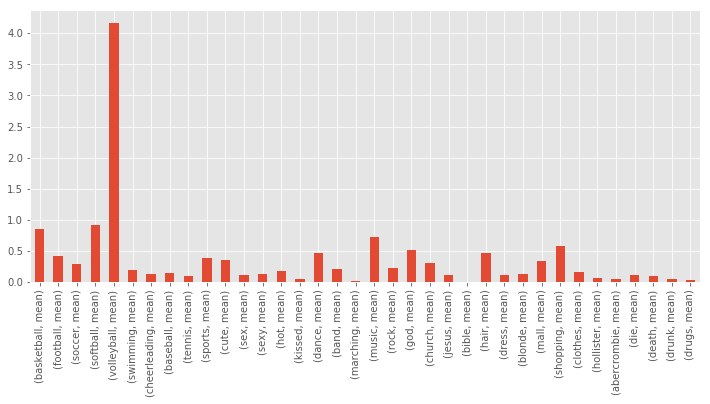

Cluster 8
Count = 694, Age = 17.5120288184, firends=41.6700288184


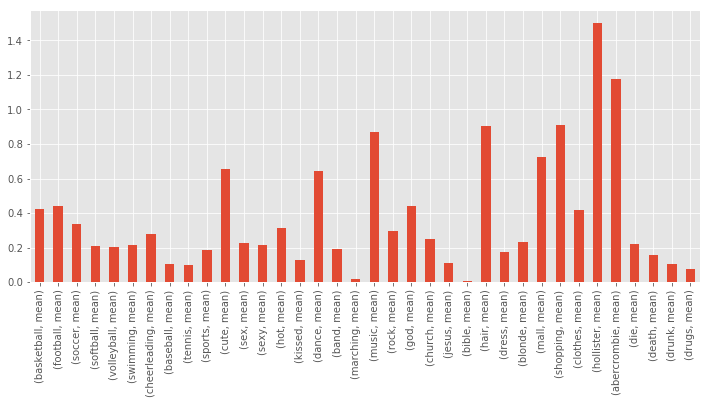

In [707]:
table_for_analysis = df_sns.groupby('Kmeans++') ['age'].aggregate (['count']).join (df_sns.groupby('Kmeans++').aggregate (['mean']))
for i in xrange(0, 9):
    print "Cluster {}".format(i)
    print "Count = {0}, Age = {1}, firends={2}".format (table_for_analysis.iloc[i, 0],
                                                        table_for_analysis.iloc[i, 2],
                                                        table_for_analysis.iloc[i, 3])
    table_for_analysis.iloc[i, 4:40].plot.bar()
    plt.show()

* Кластер 0: Люди из "современной" группы: любят музыку, танцы, шоппинг, не очень любят религию и спорт
* Кластер 1: Люди, которые следят за собой (hair) и очень озабочены личной жизнью (sex, kissed)
* Кластер 2: Спортсмены ОФП или следящие за спортом
* Кластеры 3,6,7: Теннисисты, пловцы, волейболисты: особо увлекающиеся отдельным видом спорта. Возможно, ошибочная кластеризация.
* Кластер 4: "Среднестатистические" люди. Любят музыку. Друзей меньше, чем у "выделенных" групп (вероятно, их тесная свзяь внутри себя)
* Кластер 5: Увлекающиеся религией
* Кластер 8: Люди, любящие обновить гардероб. Наибольшее количество друзей.